# Simulação de Lançamentos de Moeda com Python

Neste script, vamos explorar um fenômeno interessante na teoria da probabilidade usando a simulação de lançamentos de moeda com Python.

Quando lançamos uma moeda justa várias vezes, intuitivamente, pode parecer que sequências de "caras" ou "coroas" seriam raras. Afinal, a probabilidade de obter "cara" ou "coroa" em cada lançamento é de 50%, então esperamos que os resultados se alternem regularmente.

No entanto, a realidade é um pouco contra-intuitiva. Na verdade, em uma série de lançamentos de moeda, é comum obter sequências de "caras" ou "coroas". Isso ocorre porque cada lançamento de moeda é um evento independente, o que significa que o resultado de um lançamento não afeta o resultado do próximo.

Neste script, vamos simular milhares de lançamentos de moeda e observar a frequência de várias sequências de "caras" ou "coroas". O objetivo é demonstrar que, embora possa parecer surpreendente, sequências de resultados iguais são, na verdade, um resultado esperado da aleatoriedade.

In [1]:
# Importando a biblioteca
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import itertools
import warnings


# Simulação de Lançamentos de Moeda

Para começar, escreva uma sequência aleatória de 20 registros de 0s e 1s. Cada número na sequência representa o resultado de um lançamento de moeda, onde 1 representa "cara" e 0 representa "coroa". 

Agora, vamos simular 20 amostras de 10 lançamentos de moeda cada. Cada amostra representará uma sequência de 10 lançamentos de moeda, e vamos analisar a distribuição dos resultados em todas as 20 amostras.




In [2]:
# Definir a semente para replicabilidade
np.random.seed(42)

# Número de amostras
num_amostras = 20

# Número de lançamentos de moeda por amostra
num_lancamentos = 10

# Valores possíveis (0 para "coroa", 1 para "cara")
valores = [0, 1]

# Probabilidades para cada valor
probs = [0.5, 0.5]

# Gerar as amostras
amostras = np.random.choice(valores, size=(num_amostras, num_lancamentos), p=probs)

print(amostras)

[[0 1 1 1 0 0 0 1 1 1]
 [0 1 1 0 0 0 0 1 0 0]
 [1 0 0 0 0 1 0 1 1 0]
 [1 0 0 1 1 1 0 0 1 0]
 [0 0 0 1 0 1 0 1 1 0]
 [1 1 1 1 1 1 0 0 0 0]
 [0 0 1 0 0 1 0 1 0 1]
 [1 0 0 1 1 1 1 0 0 0]
 [1 1 0 0 0 0 1 1 1 0]
 [0 1 1 1 1 0 1 0 0 0]
 [0 1 0 1 1 0 0 1 0 0]
 [0 0 1 1 1 1 1 0 1 1]
 [1 1 0 0 0 0 1 1 0 1]
 [0 0 0 0 1 0 1 1 0 1]
 [1 0 0 0 0 0 1 1 0 0]
 [1 0 0 0 1 0 1 1 0 1]
 [0 1 1 1 0 1 0 0 0 1]
 [1 0 1 0 1 0 1 0 1 0]
 [0 0 1 1 0 1 1 1 1 0]
 [0 1 1 1 0 0 1 1 1 1]]


In [7]:
def maior_sequencia(resultado_ber):
    """
    Esta função calcula a maior sequência de "caras" (1s) e "coroas" (0s) em uma lista de resultados de lançamentos de moeda.
    
    A função usa a função `groupby` da biblioteca `itertools` para agrupar sequências consecutivas de 1s e 0s. Para cada grupo, ela calcula o comprimento da sequência e verifica se é a maior sequência de "caras" ou "coroas" encontrada até agora.
    
    Parâmetros:
    resultado_ber (list): Uma lista de 0s e 1s representando os resultados de lançamentos de moeda.
    
    Retorna:
    max_cara (int): O comprimento da maior sequência de "caras" (1s).
    max_cora (int): O comprimento da maior sequência de "coroas" (0s).
    """
    max_cara = max_cora = 0

    for valor, grupo in itertools.groupby(resultado_ber):
        sequencia = len(list(grupo))
        if valor == 1:
            max_cara = max(max_cara, sequencia)
        else:
            max_cora = max(max_cora, sequencia)

    return max_cara, max_cora

In [8]:
# Aplicar a função a cada linha
for i, linha in enumerate(amostras):
    max_cara, max_cora = maior_sequencia(linha)
    print(f"Linha {i+1}:")
    print(f"Maior sequência de cara: {max_cara}")
    print(f"Maior sequência de coroa: {max_cora}")
    print()

Linha 1:
Maior sequência de cara: 3
Maior sequência de coroa: 3

Linha 2:
Maior sequência de cara: 2
Maior sequência de coroa: 4

Linha 3:
Maior sequência de cara: 2
Maior sequência de coroa: 4

Linha 4:
Maior sequência de cara: 3
Maior sequência de coroa: 2

Linha 5:
Maior sequência de cara: 2
Maior sequência de coroa: 3

Linha 6:
Maior sequência de cara: 6
Maior sequência de coroa: 4

Linha 7:
Maior sequência de cara: 1
Maior sequência de coroa: 2

Linha 8:
Maior sequência de cara: 4
Maior sequência de coroa: 3

Linha 9:
Maior sequência de cara: 3
Maior sequência de coroa: 4

Linha 10:
Maior sequência de cara: 4
Maior sequência de coroa: 3

Linha 11:
Maior sequência de cara: 2
Maior sequência de coroa: 2

Linha 12:
Maior sequência de cara: 5
Maior sequência de coroa: 2

Linha 13:
Maior sequência de cara: 2
Maior sequência de coroa: 4

Linha 14:
Maior sequência de cara: 2
Maior sequência de coroa: 4

Linha 15:
Maior sequência de cara: 2
Maior sequência de coroa: 5

Linha 16:
Maior seq

# Viés de Amostragem e Tamanho da Amostra

O viés de amostragem ocorre quando a amostra coletada para um estudo não é representativa da população total que o estudo pretende analisar. Isso pode acontecer por várias razões, incluindo a maneira como a amostra é selecionada ou o tamanho da amostra.

O tamanho da amostra pode influenciar o viés de amostragem de várias maneiras:

1. **Amostras Pequenas**: Amostras muito pequenas têm maior probabilidade de serem não representativas da população como um todo. Isso ocorre porque há uma maior chance de que características específicas ou outliers na população sejam super ou sub-representados na amostra.

2. **Amostras Grandes**: Embora amostras maiores tendam a ser mais representativas da população, elas também podem introduzir viés se a taxa de resposta for baixa ou se certos grupos estiverem menos propensos a responder. Por exemplo, em uma pesquisa online, pessoas sem acesso à internet ou que não são confortáveis com tecnologia podem ser sub-representadas.

3. **Efeito do Tamanho da Amostra na Estatística**: O tamanho da amostra também afeta a precisão das estimativas estatísticas. Em geral, estimativas baseadas em amostras maiores tendem a ser mais precisas (ou seja, têm menor erro padrão) do que aquelas baseadas em amostras menores.

Portanto, ao projetar um estudo ou experimento, é importante considerar cuidadosamente o tamanho da amostra para minimizar o viés de amostragem e garantir que os resultados sejam o mais precisos e representativos possível. Além disso, técnicas estatísticas, como ponderação ou estratificação, podem ser usadas para corrigir o viés de amostragem em alguns casos.



Distribuição para tamanho de amostra 10:
1    0.6
0    0.4
dtype: float64


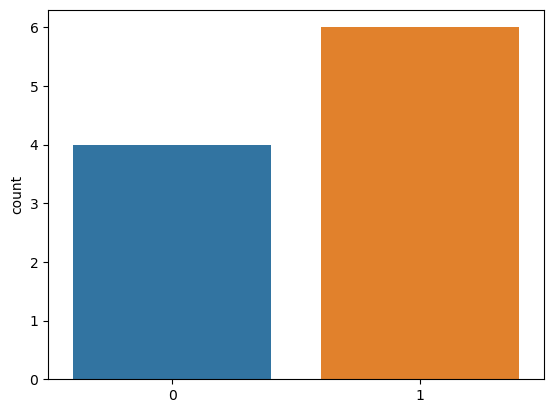


Distribuição para tamanho de amostra 100:
0    0.55
1    0.45
dtype: float64


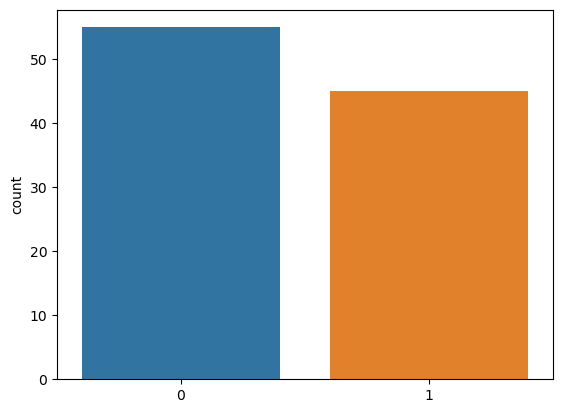


Distribuição para tamanho de amostra 1000:
1    0.505
0    0.495
dtype: float64


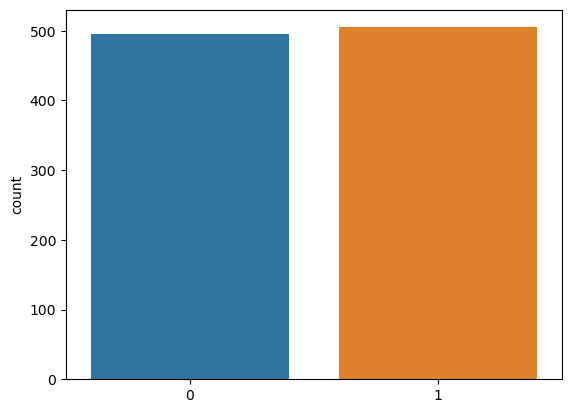


Distribuição para tamanho de amostra 1000000:
1    0.500544
0    0.499456
dtype: float64


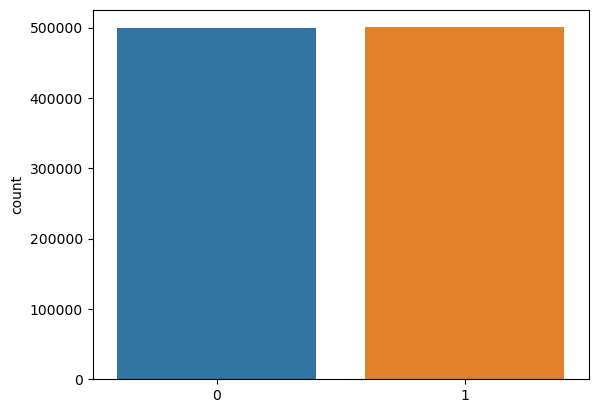

In [11]:
import warnings
warnings.filterwarnings('ignore')

import scipy.stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Definir a semente do gerador de números aleatórios
np.random.seed(42)

# Lista de tamanhos de amostra
sizes = [10, 100, 1000, 1000000]

# Dicionário para armazenar os resultados
resultados = {}

# Loop sobre os tamanhos de amostra
for size in sizes:
    # Gerar amostra de Bernoulli
    resultado_ber = scipy.stats.bernoulli.rvs(p=0.5, size=size)
    
    # Armazenar o resultado no dicionário
    resultados[size] = resultado_ber

    # Contagem de valores
    print(f"\nDistribuição para tamanho de amostra {size}:")
    print(pd.Series(resultado_ber).value_counts(normalize=True))

    # Gráfico de contagem
    sns.countplot(resultado_ber)
    plt.show()


# Lei dos Grandes Números

A "lei dos grandes números" é um princípio fundamental da probabilidade e estatística. Ela afirma que, à medida que o número de experimentos aumenta, a média dos resultados obtidos se aproxima da expectativa teórica.

No caso do lançamento de uma moeda, embora a probabilidade de obter "cara" em 10 lançamentos consecutivos seja baixa (0,1%), se repetirmos esse experimento muitas vezes (por exemplo, 100.000 vezes), é provável que vejamos essa sequência "improvável" ocorrer em algumas das repetições.

Isso demonstra que eventos que podem parecer improváveis em um único experimento podem se tornar bastante comuns quando o experimento é repetido muitas vezes. Portanto, é crucial entender os conceitos de probabilidade ao interpretar os resultados de um experimento ou estudo.


In [14]:
from scipy.stats import binom
# Definir a semente para replicabilidade
np.random.seed(42)

# Número de pessoas no estádio
num_pessoas = 100000

# Número de lançamentos de moeda por pessoa
num_lancamentos = 10

# Probabilidade de obter "cara" em um lançamento de moeda
p_cara = 0.5

# Simular os lançamentos de moeda para cada pessoa
resultados = np.random.binomial(num_lancamentos, p_cara, num_pessoas)

# Contar o número de pessoas que obtiveram pelo menos 10 "caras"
num_sucessos = np.sum(resultados >= 10)

# Calcular a probabilidade de obter pelo menos 10 "caras" usando a distribuição binomial
p_sucesso = binom.pmf(10, num_lancamentos, p_cara)

print(f"Número de pessoas que obtiveram pelo menos {num_lancamentos} 'caras': {num_sucessos}")
print(f"Probabilidade de obter pelo menos {num_lancamentos} 'caras' em {num_lancamentos} lançamentos: {p_sucesso:.1%}")

Número de pessoas que obtiveram pelo menos 10 'caras': 86
Probabilidade de obter pelo menos 10 'caras' em 10 lançamentos: 0.1%
